✅ Model Performance:
RMSE: 21.5829
MAE: 15.4403
R²: -0.7018


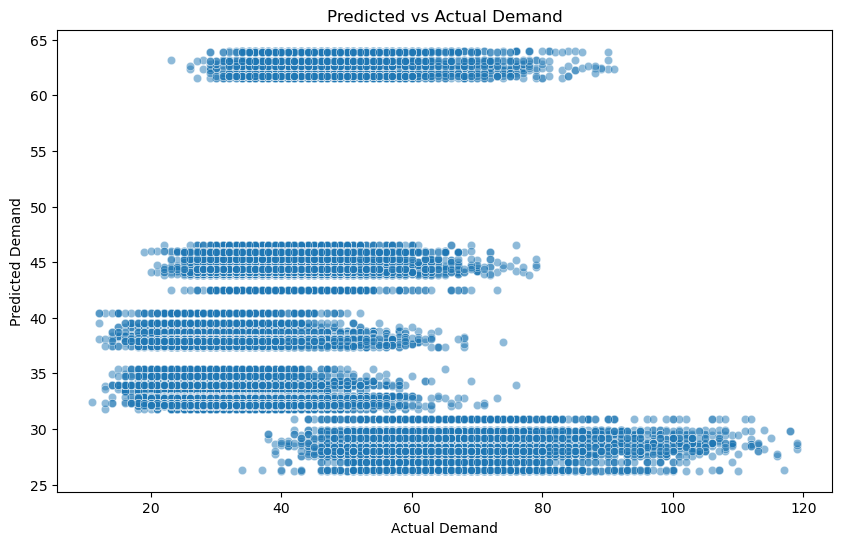

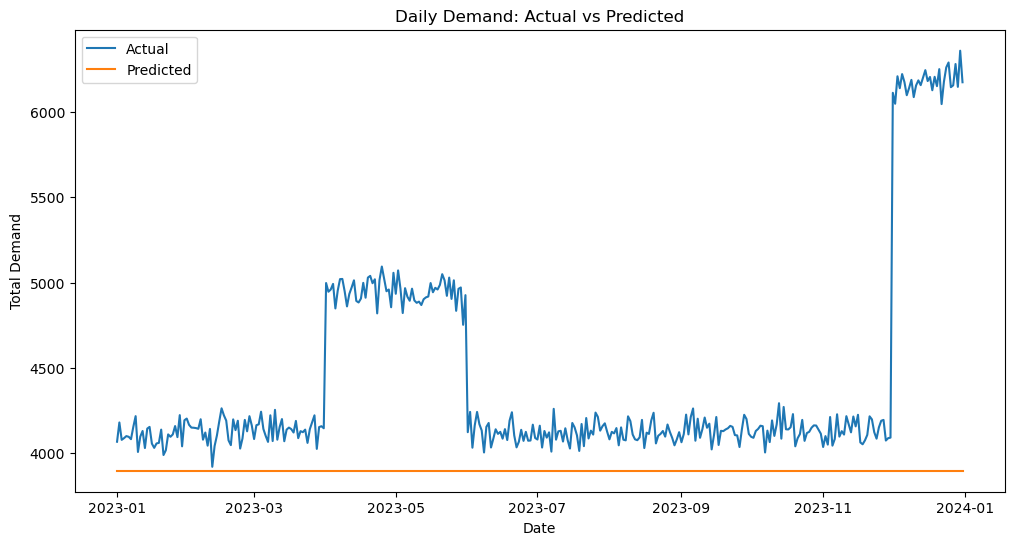

In [2]:
# 01_demand_analysis.ipynb

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

DATA_PATH = "../data/simulated_pricing_data.csv"
MODEL_PATH = "../models/demand_forecast.pkl"

# Load data
df = pd.read_csv(DATA_PATH)
df['date'] = pd.to_datetime(df['date'])

# Load model
model = joblib.load(MODEL_PATH)

# Prepare features
X = df.drop(columns=['date','demand','sku'], errors='ignore')
X.columns = X.columns.str.replace(' ', '_')

# Encode categorical features
X = pd.get_dummies(X, columns=['category', 'seller_tier'])

y_true = df['demand']

# Predict
y_pred = model.predict(X)

# Performance metrics
rmse = mean_squared_error(y_true, y_pred) ** 0.5
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"✅ Model Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# Plot predicted vs actual demand
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Predicted vs Actual Demand")
plt.show()

# Time series of total demand
df['predicted_demand'] = y_pred
daily = df.groupby('date')[['demand','predicted_demand']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily['date'], daily['demand'], label='Actual')
plt.plot(daily['date'], daily['predicted_demand'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.title('Daily Demand: Actual vs Predicted')
plt.legend()
plt.show()
